In [22]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import mysql.connector as connection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

In [2]:
sql= "select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.account_id" 

In [3]:
try:
    mydb = connection.connect(host="localhost", database = 'capstone_prj',user="root", passwd="Jinu@2410",use_pure=True)
    df = pd.read_sql(sql,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

C:\Users\USER\AppData\Local\Temp\ipykernel_19752\1639140124.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,mydb)


In [4]:
df.head()

,card_id,disp_id,type,issued,account_id,disposition_client_id,disposition_type,client_id,birth_number,district_id,...,balance,k_symbol,bank,account,loan_id,loan_date,loan_amount,duration,payments,status
0,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,19916.6,UROK,,,5325,930803,105804,36,2939.0,A
1,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,26099.1,,,,5325,930803,105804,36,2939.0,A
2,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,19799.1,,,,5325,930803,105804,36,2939.0,A
3,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,24499.1,SIPO,QR,62958741,5325,930803,105804,36,2939.0,A
4,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,31493.1,UVER,QR,70984434,5325,930803,105804,36,2939.0,A


In [5]:
df.shape

(868, 50)

In [6]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id', 'date',
       'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account',
       'loan_id', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status'],
      dtype='object')

In [7]:
df.isnull().sum()

card_id                  0
disp_id                  0
type                     0
issued                   0
account_id               0
disposition_client_id    0
disposition_type         0
client_id                0
birth_number             0
district_id              0
A1                       0
A2                       0
A3                       0
A4                       0
A5                       0
A6                       0
A7                       0
A8                       0
A9                       0
A10                      0
A11                      0
A12                      0
A13                      0
A14                      0
A15                      0
A16                      0
order_id                 0
bank_to                  0
account_to               0
amount                   0
k_symbol                 0
account_date             0
account_district_id      0
frequency                0
trans_id                 0
account_id               0
date                     0
t

In [8]:
df.status.value_counts()

status
A    648
B    168
C     51
D      1
Name: count, dtype: int64

In [9]:
df.status = pd.DataFrame(df.status.map({'A': 0, 'B': 1, 'C': 2, 'D': 3}),
                         columns=['status'])
display(df.status)

0      0
1      0
2      0
3      0
4      0
      ..
863    0
864    0
865    0
866    0
867    0
Name: status, Length: 868, dtype: int64

In [10]:
display (df.status.value_counts())

status
0    648
1    168
2     51
3      1
Name: count, dtype: int64

In [11]:
x=df[['loan_amount','duration','payments']].values
display(x)

array([[1.05804e+05, 3.60000e+01, 2.93900e+03],
       [1.05804e+05, 3.60000e+01, 2.93900e+03],
       [1.05804e+05, 3.60000e+01, 2.93900e+03],
       ...,
       [8.03400e+04, 1.20000e+01, 6.69500e+03],
       [8.03400e+04, 1.20000e+01, 6.69500e+03],
       [2.82480e+04, 2.40000e+01, 1.17700e+03]])

In [12]:
y=df['status'].values
display (y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
sc_x= MinMaxScaler()
x = sc_x.fit_transform(x)
print (x)

[[0.28768316 0.5        0.28866317]
 [0.28768316 0.5        0.28866317]
 [0.28768316 0.5        0.28866317]
 ...
 [0.20733785 0.         0.90399738]
 [0.20733785 0.         0.90399738]
 [0.04297452 0.25       0.        ]]


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=143)
display (x_train.shape)
display (x_test.shape)
display (y_train.shape)
display (y_test.shape)

(607, 3)

(261, 3)

(607,)

(261,)

In [15]:
accuracy=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn=knn.fit(x_train,y_train)
    y_pred =knn.predict(x_train)
    acc= accuracy_score (y_train,y_pred)
    accuracy.append (acc)
    
display (accuracy)

[1.0,
 1.0,
 1.0,
 0.9967051070840197,
 0.9934102141680395,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692,
 0.9884678747940692]

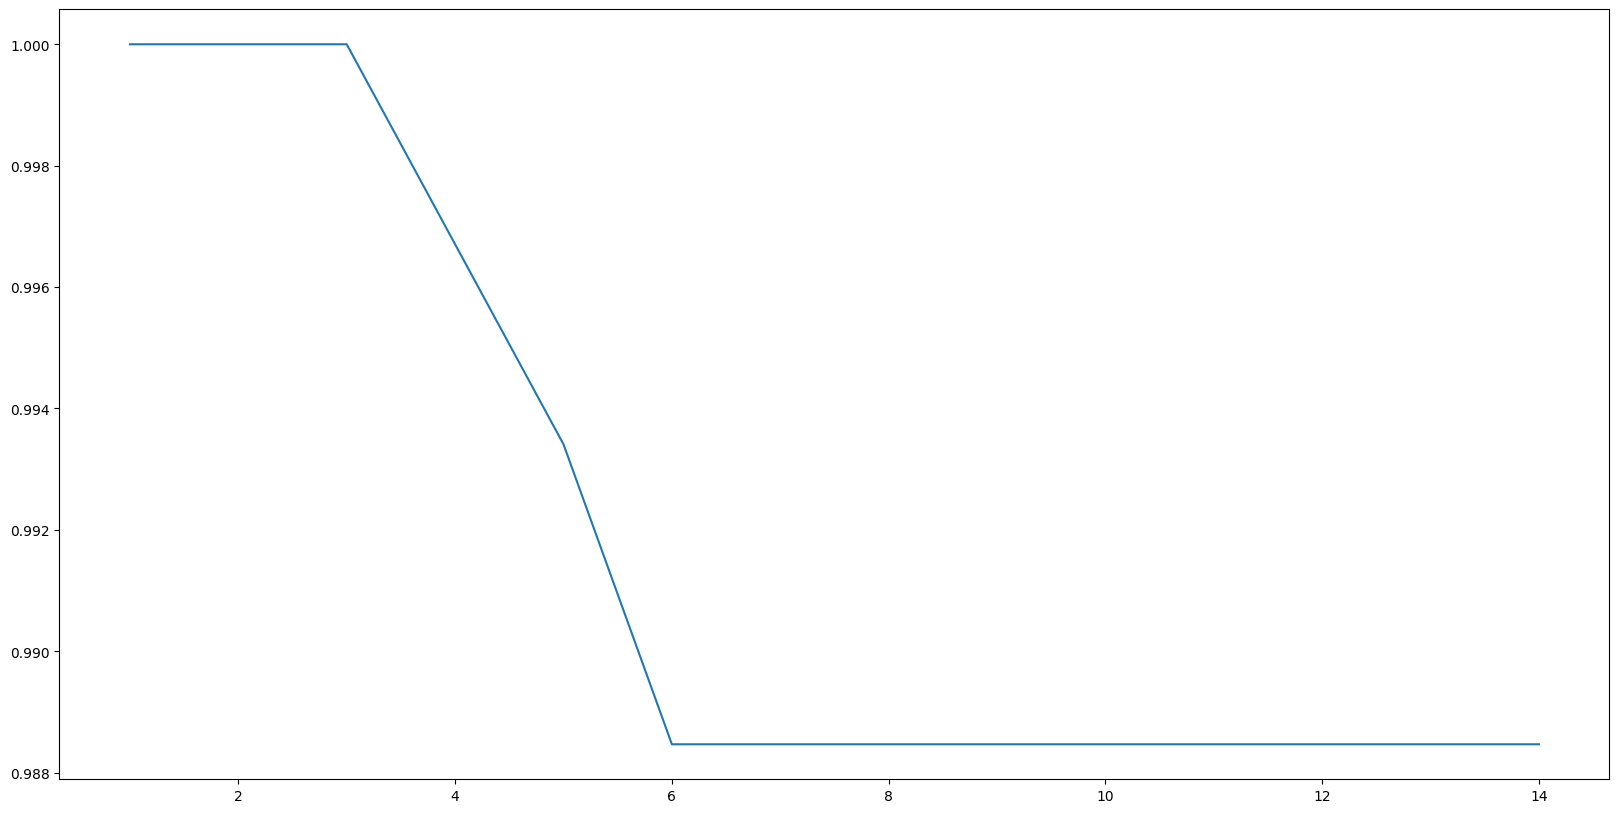

In [16]:
plt.plot(range(1,15),accuracy)
plt.show()

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)
knn=knn.fit(x_train,y_train)

In [18]:
y_pred = knn.predict (x_test)
display (accuracy_score(y_pred , y_test))

0.9961685823754789

In [19]:
knn=KNeighborsClassifier(n_neighbors=10)
knn=knn.fit(x_train,y_train)
y_pred = knn.predict (x_test)
display (accuracy_score(y_pred , y_test))

0.9731800766283525

In [20]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      0.89      0.94        56
           2       0.67      1.00      0.80        14
           3       0.00      0.00      0.00         1

    accuracy                           0.97       261
   macro avg       0.67      0.72      0.69       261
weighted avg       0.98      0.97      0.97       261



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [23]:
cm = confusion_matrix (y_test,y_pred)
print (cm)

[[190   0   0   0]
 [  0  50   6   0]
 [  0   0  14   0]
 [  0   0   1   0]]


In [26]:
TREE = DecisionTreeClassifier(criterion='entropy')
TREE.fit(x_train,y_train)
TREE_pred = TREE.predict(x_test)
print(TREE_pred)
print(pd.DataFrame(TREE_pred).groupby(0).agg({0:np.size}))

[0 0 1 1 1 1 2 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 2 0 0 1 2 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 1 1 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 2 1 0 1 0 2 0 0 1 2 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 2 0
 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 1 0 0
 1 0]
     0
0     
0  190
1   56
2   15


In [27]:
print('\n Accuracy Score')
print(accuracy_score(y_test,TREE_pred))


 Accuracy Score
0.9961685823754789


In [28]:
print('\nClassification Report')
print(classification_report (y_test,TREE_pred))


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        56
           2       0.93      1.00      0.97        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.73      0.75      0.74       261
weighted avg       0.99      1.00      0.99       261



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [29]:
print('Confusion Matrix')
print (confusion_matrix (y_test,TREE_pred))

Confusion Matrix
[[190   0   0   0]
 [  0  56   0   0]
 [  0   0  14   0]
 [  0   0   1   0]]


In [30]:
TREE = DecisionTreeClassifier (criterion = 'gini')
TREE.fit(x_train,y_train)
TREE_pred = TREE.predict(x_test)
print (TREE_pred)
print (pd.DataFrame(TREE_pred).groupby(0).agg({0:np.size}))

[0 0 1 1 1 1 2 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 2 0 0 1 2 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 1 1 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 2 1 0 1 0 2 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 2 0
 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 1 0 0
 1 0]
     0
0     
0  190
1   57
2   14


In [31]:
print('\n Accuracy Score')
print (accuracy_score (y_test,TREE_pred))


 Accuracy Score
0.9961685823754789


In [32]:
print('\nClassification Report')
print(classification_report (y_test,TREE_pred))


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.75      0.75      0.75       261
weighted avg       0.99      1.00      0.99       261



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [33]:
print('Confusion Matrix')
print (confusion_matrix (y_test,TREE_pred))

Confusion Matrix
[[190   0   0   0]
 [  0  56   0   0]
 [  0   0  14   0]
 [  0   1   0   0]]


In [34]:
RF = RandomForestClassifier(n_estimators=50, criterion='entropy')
RF.fit(x_train,y_train)
RF_pred = RF.predict(x_test)
print (RF_pred)
print (pd.DataFrame(RF_pred).groupby(0).agg({0:np.size}))

[0 0 1 1 1 1 2 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 2 0 0 1 2 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 1 1 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 2 1 0 1 0 2 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 2 0
 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 1 0 0
 1 0]
     0
0     
0  190
1   57
2   14


In [35]:
print('\n Accuracy Score')
print (accuracy_score (y_test,RF_pred))


 Accuracy Score
0.9961685823754789


In [36]:
print('\nClassification Report')
print(classification_report (y_test,RF_pred))


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.75      0.75      0.75       261
weighted avg       0.99      1.00      0.99       261



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [37]:
print('Confusion Matrix')
print (confusion_matrix (y_test,RF_pred))

Confusion Matrix
[[190   0   0   0]
 [  0  56   0   0]
 [  0   0  14   0]
 [  0   1   0   0]]


In [38]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
log_pred = logmodel.predict(x_test)
print (log_pred)
print (pd.DataFrame(log_pred).groupby(0).agg({0: np.size}))

[0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0]
     0
0     
0  209
1   52


In [39]:
print('\n Accuracy Score')
print (accuracy_score (y_test,log_pred))


 Accuracy Score
0.9118773946360154


In [40]:
print('\nClassification Report')
print(classification_report (y_test,log_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       190
           1       0.96      0.89      0.93        56
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         1

    accuracy                           0.91       261
   macro avg       0.47      0.47      0.47       261
weighted avg       0.86      0.91      0.88       261



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [41]:
print('Confusion Matrix')
print (confusion_matrix (y_test,log_pred))

Confusion Matrix
[[188   2   0   0]
 [  6  50   0   0]
 [ 14   0   0   0]
 [  1   0   0   0]]
